# Herron Topic 1 - Practice for Section 05

## Announcements

1. DataCamp
   1. *Data Manipulation with pandas* due by Friday, 2/9, at 11:59 PM
   2. *Joining Data with pandas* due by Friday, 2/16, at 11:59 PM
   3. *Earn 10,000 XP* due by Friday, 3/15, at 11:59 PM
2. I posted Project 1 to Canvas
   1. Slides and notebook due by Friday, 2/23, at 11:59 PM
   2. Keep joining teams and let me know if you need help

## 10-Minute Recap

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import yfinance as yf

In [2]:
%precision 4
pd.options.display.float_format = '{:.4f}'.format
%config InlineBackend.figure_format = 'retina'

First, we will use two packages to download data from the Web:

1. `yfinance` for Yahoo! Finance
2. `pandas-datareader` for Ken French (and FRED and many others)

Second, there are "simple returns" and "log returns"

1. Simple returns are the returns that investors receive that we learned in FINA 6331 and FINA 6333: $r_t = \frac{p_t + d_t - p_{t-1}}{p_{t-1}}$
3. Log returns are the log of one plus simple returns. Why do we use them?
   1. ***Log returns are additive***, while simple returns are multiplicative. This additive property makes math really easy with log returns: $\log(\prod_{t=0}^T (1 + r_t)) = \sum_{t=0}^T \log(1+r_t)$, so $r_{0,T} = \prod_{t=0}^T (1 + r_t) - 1 = e^{\sum_{t=0}^T \log(1+r_t)} - 1$
   2. ***Log returns are almost normally distributed***
  
***We will almost always use simple returns.***
The exeception is time-consuming calculations, which we will often do in log returns to save us time.

Third, we can calculate portfolio returns a few ways!

1. `returns.mean(axis=1)` is *equally-weighted* portfolio returns, rebalanced at the same frequency as the returns (i.e., rebalanced every return period)
2. `returns.dot(weights)` lets us use any weights in the `weights` array, rebalanced at the same frequency as the returns

## Practice

### Download all available daily price data for tickers TSLA, F, AAPL, AMZN, and META to data frame `prices`

In [3]:
tickers = 'TSLA F AAPL AMZN META'
prices = yf.download(tickers=tickers)

[*********************100%%**********************]  5 of 5 completed


In [4]:
prices.head()

Adj Close                       Close                        ...  \
                AAPL AMZN      F META TSLA  AAPL AMZN      F META TSLA  ...   
Date                                                                    ...   
1972-06-01       NaN  NaN 0.2419  NaN  NaN   NaN  NaN 2.1532  NaN  NaN  ...   
1972-06-02       NaN  NaN 0.2414  NaN  NaN   NaN  NaN 2.1492  NaN  NaN  ...   
1972-06-05       NaN  NaN 0.2414  NaN  NaN   NaN  NaN 2.1492  NaN  NaN  ...   
1972-06-06       NaN  NaN 0.2387  NaN  NaN   NaN  NaN 2.1248  NaN  NaN  ...   
1972-06-07       NaN  NaN 0.2373  NaN  NaN   NaN  NaN 2.1127  NaN  NaN  ...   

           Open                       Volume                          
           AAPL AMZN      F META TSLA   AAPL AMZN        F META TSLA  
Date                                                                  
1972-06-01  NaN  NaN 0.0000  NaN  NaN    NaN  NaN  1091238  NaN  NaN  
1972-06-02  NaN  NaN 2.1532  NaN  NaN    NaN  NaN  1174468  NaN  NaN  
1972-06-05  NaN  NaN 2.1492  NaN  NaN    NaN  NaN  5209582  NaN  NaN  
1972-06-06  NaN  NaN 2.1492  NaN  NaN    NaN  NaN  1424158  NaN  NaN  
1972-06-07  NaN  NaN 2.1248  NaN  NaN    NaN  NaN   675088  NaN  NaN  

[5 rows x 30 columns]

### Calculate all available daily returns and save to data frame `returns`

In [5]:
returns = (
    prices['Adj Close'] # slice adj close
    .iloc[:-1] # drop the last price because it might be intraday (i.e., not a close)
    .pct_change() # calculate simple returns
)

returns

,AAPL,AMZN,F,META,TSLA
Date,,,,,
1972-06-01,NaN,NaN,NaN,NaN,NaN
1972-06-02,NaN,NaN,-0.0019,NaN,NaN
1972-06-05,NaN,NaN,0.0000,NaN,NaN
1972-06-06,NaN,NaN,-0.0113,NaN,NaN
1972-06-07,NaN,NaN,-0.0057,NaN,NaN
...,...,...,...,...,...
2024-01-30,-0.0192,-0.0140,0.0199,-0.0024,0.0035
2024-01-31,-0.0194,-0.0239,-0.0051,-0.0248,-0.0224
2024-02-01,0.0133,0.0263,0.0324,0.0119,0.0084


### Slices returns for the 2020s and assign to `returns_2020s`

In [6]:
returns_2020s = returns.loc['2020':] # always use an unambiguos date format, like YYYY-MM-DD

returns_2020s

,AAPL,AMZN,F,META,TSLA
Date,,,,,
2020-01-02,0.0228,0.0272,0.0129,0.0221,0.0285
2020-01-03,-0.0097,-0.0121,-0.0223,-0.0053,0.0296
2020-01-06,0.0080,0.0149,-0.0054,0.0188,0.0193
2020-01-07,-0.0047,0.0021,0.0098,0.0022,0.0388
2020-01-08,0.0161,-0.0078,0.0000,0.0101,0.0492
...,...,...,...,...,...
2024-01-30,-0.0192,-0.0140,0.0199,-0.0024,0.0035
2024-01-31,-0.0194,-0.0239,-0.0051,-0.0248,-0.0224
2024-02-01,0.0133,0.0263,0.0324,0.0119,0.0084


### Download all available data for the Fama and French daily benchmark factors to dictionary `ff_all`

I often use the following code snippet to find the exact name for the the daily benchmark factors file.

In [7]:
pdr.famafrench.get_available_datasets()[:5]

['F-F_Research_Data_Factors',
 'F-F_Research_Data_Factors_weekly',
 'F-F_Research_Data_Factors_daily',
 'F-F_Research_Data_5_Factors_2x3',
 'F-F_Research_Data_5_Factors_2x3_daily']

In [8]:
ff_all = pdr.DataReader(
    name='F-F_Research_Data_Factors_daily',
    data_source='famafrench',
    start='1900' # most data start in 1926-07-01, but 1900 is easier to remember and type
)

C:\Users\r.herron\AppData\Local\Temp\ipykernel_15912\4231759426.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  ff_all = pdr.DataReader(


The `DESCR` key in the dictionary tells us about the data frames that `pandas-datareader` returns.

In [9]:
print(ff_all['DESCR'])

F-F Research Data Factors daily
-------------------------------

This file was created by CMPT_ME_BEME_RETS_DAILY using the 202312 CRSP database. The Tbill return is the simple daily rate that, over the number of trading days in the month, compounds to 1-month TBill rate from Ibbotson and Associates Inc. Copyright 2023 Kenneth R. French

  0 : (25649 rows x 4 cols)


### Slice the daily benchmark factors, convert them to decimal returns, and assign to `ff`

In [10]:
ff = ff_all[0].div(100)

ff

,Mkt-RF,SMB,HML,RF
Date,,,,
1926-07-01,0.0010,-0.0025,-0.0027,0.0001
1926-07-02,0.0045,-0.0033,-0.0006,0.0001
1926-07-06,0.0017,0.0030,-0.0039,0.0001
1926-07-07,0.0009,-0.0058,0.0002,0.0001
1926-07-08,0.0021,-0.0038,0.0019,0.0001
...,...,...,...,...
2023-12-22,0.0021,0.0064,0.0009,0.0002
2023-12-26,0.0048,0.0069,0.0046,0.0002
2023-12-27,0.0016,0.0014,0.0012,0.0002


### Use the `.cumprod()` method to plot cumulative returns for these stocks in the 2020s

We use the `.prod()` method to calculate *total* returns, because $r_{total} = r_{0,T} = \left[ \prod_{t=0}^T (1 + r_t) \right] -1$.

In [11]:
(
    returns_2020s # returns during the 2020s
    .add(1) # add 1 before we compound
    .prod() # compound all returns
    .sub(1) # subtract 1 to recover total returns
)

AAPL   1.6241
AMZN   0.8433
F      0.4535
META   1.2383
TSLA   5.4922
dtype: float64

We use the `.cumprod()` to calculate *cumulative* returns, which are the total returns for every date between $0$ and $T$ (i.e., $r_{0,t} \forall t \in {0, 1, \ldots T}$)

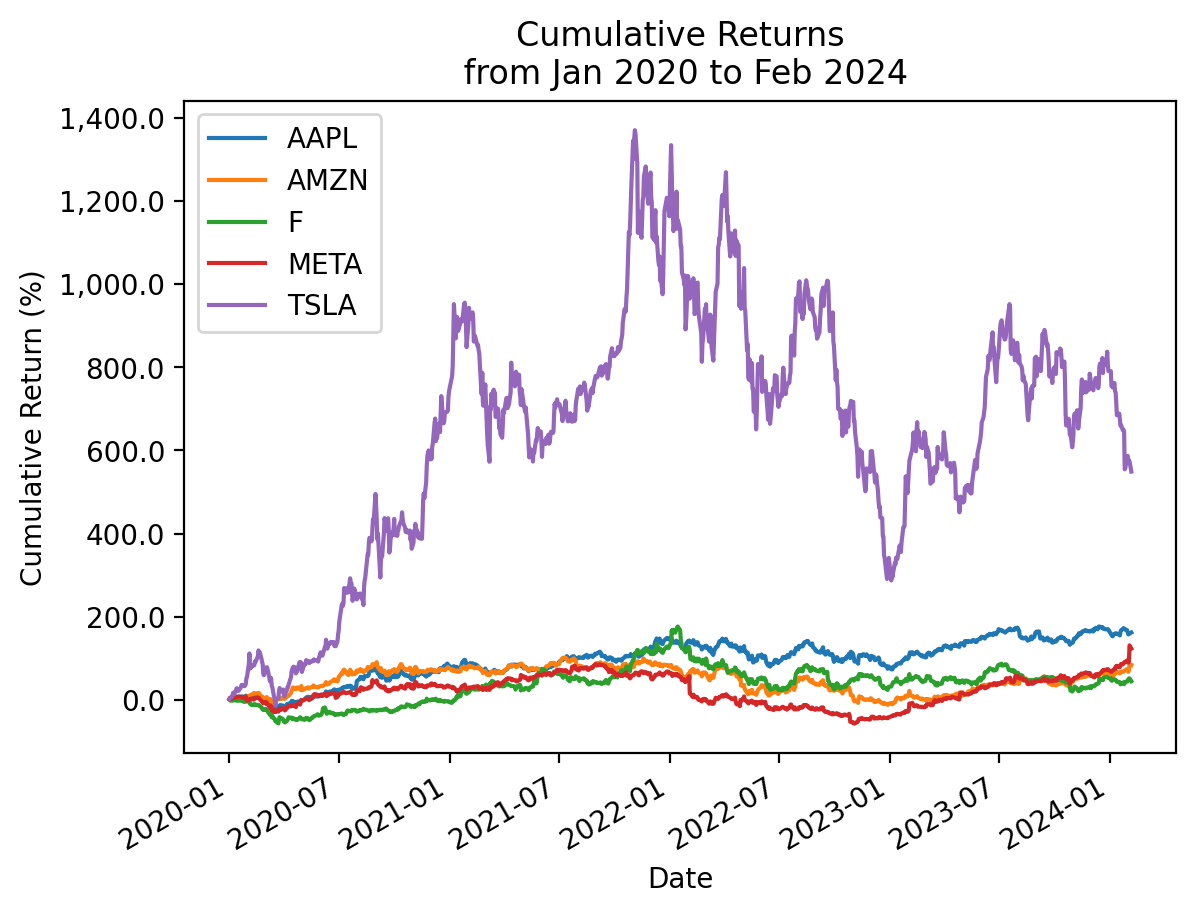

In [12]:
(
    returns_2020s # returns during the 2020s
    .add(1) # add 1 before we compound
    .cumprod() # compound returns up to time t
    .sub(1) # subtract 1 to recover cumulative return at time t
    .mul(100) # convert decimal to percent
    .plot() # plot
)

# https://stackoverflow.com/questions/25973581/how-to-format-axis-number-format-to-thousands-with-a-comma
from matplotlib import ticker
plt.gca().get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: '{:,}'.format(x)))

plt.ylabel('Cumulative Return (%)')
plt.title(f'Cumulative Returns\n from {returns_2020s.index.min():%b %Y} to {returns_2020s.index.max():%b %Y}')
plt.show()

### Use the `.cumsum()` method with log returns to plot cumulative returns for these stocks in the 2020s

### Use price data only to plot cumulative returns for these stocks in the 2020s

### Calculate the Sharpe Ratio for TSLA

Calculate the Sharpe Ratio with all available returns and 2020s returns.
Recall the Sharpe Ratio is $\frac{\overline{R_i - R_f}}{\sigma_i}$, where $\sigma_i$ is the volatility of *excess* returns.

***I suggest you write a function named `calc_sharpe()` to use for the rest of this notebook.***

### Calculate the market beta for TSLA

Calculate the market beta with all available returns and 2020s returns.
Recall we estimate market beta with the ordinary least squares (OLS) regression $R_i-R_f = \alpha + \beta (R_m-R_f) + \epsilon$.
We can estimate market beta with the covariance formula above for a univariate regression if we do not need goodness of fit statistics.

***I suggest you write a function named `calc_beta()` to use for the rest of this notebook.***

### Guess the Sharpe Ratios for these stocks in the 2020s

### Guess the market betas for these stocks in the 2020s

### Calculate the Sharpe Ratios for these stocks in the 2020s

How good were your guesses?

### Calculate the market betas for these stocks in the 2020s

How good were your guesses?

### Calculate the Sharpe Ratio for an *equally weighted* portfolio of these stocks in the 2020s

What do you notice?

### Calculate the market beta for an *equally weighted* portfolio of these stocks in the 2020s

What do you notice?

### Calculate the market betas for these stocks every calendar year for every possible year

Save these market betas to data frame `betas`.
Our current Python knowledge limits us to a for-loop, but we will learn easier and faster approaches soon!

### Plot the time series of market betas